In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
from scipy.stats import skew
import re
import csv
import seaborn as sns
from collections import Counter
%matplotlib inline

# load data

In [2]:
content_df=pd.read_csv('201705-20170614_ap_articles.csv', sep=',')

In [3]:
content_df

,id,body,capi-id,categories,content-type,content-type-short,created,hotness,image-url,last-modified,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,0Rrg6,Etter helgens Premier League-runde er det fire...,234850,[fotball],news,news,2017-05-01T07:18:03.000Z,40,https://vertical.snd.no/images/38c6a0c9-64c3-4...,2017-05-01T08:56:02.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Den...,2017-05-01T08:30:13.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[manchester city, engelsk fotball, manchester ...",Den tette kampen mellom Guardiola og Klopp kan...
1,0Rr7G,Også denne sesongen har Lionel Messi bøttet in...,234868,[fotball],news,news,2017-05-01T15:16:34.000Z,40,https://vertical.snd.no/images/ba027d24-cee0-4...,2017-05-01T17:26:51.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Bil...,2017-05-01T17:22:22.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[lionel messi, teheran, barcelona, argentina, ...",Bildene av Messis dobbeltgjenger går verden ru...
2,1lrJl,Sarpsborg-Rosenborg 1–2 \n– Det blir den klass...,234881,[fotball],news,news,2017-05-01T19:54:36.000Z,40,https://vertical.snd.no/images/6abc8680-05af-4...,2017-05-01T20:52:37.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Fo...,2017-05-01T20:52:37.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[eliteserien, sarpsborg 08, rosenborg bk]",– For fem år siden hadde jeg sikkert gravd meg...
3,1lr9e,"Hamas-leder Khaled Meshaal, som bor i eksil i ...",620268,[verden],news,news,2017-05-01T18:38:32.000Z,30,https://ap.mnocdn.no/images/afb62071-4c86-4a1c...,2017-05-01T18:42:25.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Hamas-vil-ikk...,2017-05-01T18:38:32.000Z,http://www.aftenposten.no/article/ap-620268b.html,ap,bench,published,[],Hamas vil ikke lenger kreve at Israel skal uts...
4,0RrOJ,Hoppsjef Clas Brede Bråthen har sagt til NTB a...,234859,[vintersport],news,news,2017-05-01T11:16:31.000Z,30,https://vertical.snd.no/images/259a16bf-c2cd-4...,2017-05-01T11:18:40.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/vintersport...,2017-05-01T11:18:23.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[hopp, holmenkollen, fis]",Skiforbundet vil ikke flytte Kollensøndagen
5,0RWrJ,Siv Jensen tar imot Aftenposten på møterommet ...,620160,"[norge, politikk]",news,news,2017-04-28T16:46:11.000Z,60,https://ap.mnocdn.no/images/edda47a8-6b1d-45c2...,2017-05-01T18:45:07.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/---De...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-620160b.html,ap,bench,published,"[siv jensen, stortingsvalg 2017, fremskrittspa...",- Det er ganske kjedelig i lengden når hvert ...
6,0Rr8A,Underholdning er ikke mangelvare i den ustabil...,234883,[fotball],news,news,2017-05-01T20:36:45.000Z,30,https://vertical.snd.no/images/8684374e-bde7-4...,2017-05-01T21:06:04.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Mi...,2017-05-01T21:06:04.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[mushaga bakenga, tore reginiussen, sarpsborg,...",Minner mer og mer om Erik Hamréns RBK
7,1aK7e,– 2016 var året USA og Storbritannia våknet op...,618629,[verden],news,news,2017-04-04T15:36:49.000Z,60,https://ap.mnocdn.no/images/8a59f5df-bd5a-43e6...,2017-05-01T21:07:21.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Trumps-seier-...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-618629b.html,ap,bench,published,"[marine le pen, donald trump, presidentvalget ...",Trumps seier har ikke løftet protestpartiene i...
8,26oea,Alexander Kristoff (29) klinket till og vant E...,234874,[sykkel],news,news,2017-05-01T16:48:59.000Z,40,https://vertical

# check issue data

In [86]:
content_df.keys()

Index(['contentId', 'body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title', 'check null'],
      dtype='object')

In [88]:
(content_df.isnull()).describe()

,contentId,body,capi-id,categories,content-type,content-type-short,created,hotness,image-url,last-modified,...,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title,check null
count,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882,...,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882
unique,1,2,1,1,1,1,1,1,2,1,...,2,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,3882,3806,3882,3882,3882,3882,3882,3882,3656,3882,...,3881,3882,3882,3882,3882,3882,3882,3882,3882,3882


In [99]:
(content_df.isnull().describe()).loc['unique']

contentId              1
body                   2
capi-id                1
categories             1
content-type           1
content-type-short     1
created                1
hotness                1
image-url              2
last-modified          1
lead                   2
lifetime               1
normalized-hotness     1
normalized-lifetime    1
paywall-state          2
paywall-type           2
presentation-url       1
published              1
share-url              1
source-publication     1
source-system          1
status                 1
tags                   1
title                  1
check null             1
Name: unique, dtype: object

In [103]:
((content_df.isnull().describe()).loc['freq'])/3882

contentId                     1
body                   0.980422
capi-id                       1
categories                    1
content-type                  1
content-type-short            1
created                       1
hotness                       1
image-url              0.941783
last-modified                 1
lead                   0.994075
lifetime                      1
normalized-hotness            1
normalized-lifetime           1
paywall-state          0.999742
paywall-type           0.999742
presentation-url              1
published                     1
share-url                     1
source-publication            1
source-system                 1
status                        1
tags                          1
title                         1
check null                    1
Name: freq, dtype: object

# dataset exploration
### categories

content_df.categories.value_counts()

In [104]:
len(content_df.categories.value_counts())

35

In [23]:
a=content_df.categories.value_counts()

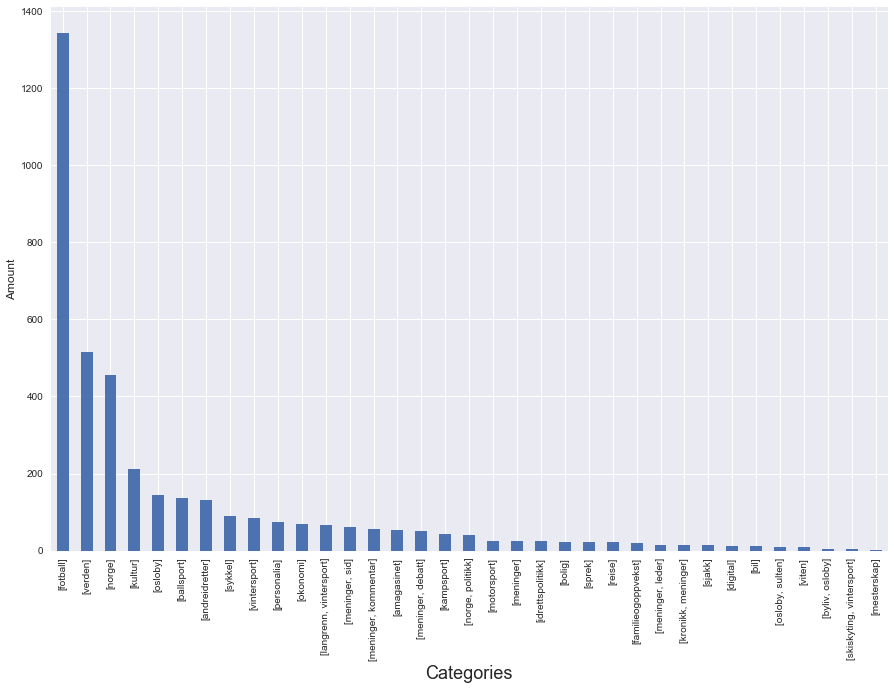

In [24]:
sns.set(rc={"figure.figsize": (15, 10)})
a.plot(kind='bar')
plt.xlabel('Categories', fontsize=18)
plt.ylabel('Amount', fontsize=12)

# tags

In [8]:
import itertools

tag_df=pd.DataFrame(
    [r for r in itertools.chain.from_iterable([(index, tag) for tag in row['tags'].split(',')] 
                                              for index, row in content_df.set_index('id').iterrows())]
)

In [9]:
tag_df.columns = ['contentid', 'tag']

In [10]:
tag=tag_df['tag'].map(lambda x: x.lstrip('[').rstrip(']' ))

In [11]:
tag.replace('', np.nan, inplace=True)

In [12]:
tag.dropna(inplace=True)

In [28]:
tag.value_counts()

eliteserien               229
 eliteserien              167
 fotball                  153
 rosenborg bk             109
slaget om sørlandet       100
 donald trump              93
 sk brann                  93
 ik start                  90
 usa                       89
 tromsø il                 84
 slaget om sørlandet       72
 viking fk                 64
 molde fk                  62
 premier league            61
 norge                     61
 aalesund fk               59
 politiet                  57
oslo                       57
 terror                    52
 bergen                    50
håndball                   48
 oslo                      44
 fk jerv                   44
fotball-nm                 42
 friidrett                 41
 ol                        40
 sykkel                    40
 økonomi                   40
 manchester united         39
 nicklas bendtner          38
                         ... 
 vardø                      1
 dag eilev fagermo          1
 rikshospi

In [105]:
(tag.value_counts()).describe()

count    2766.000000
mean        3.945409
std         9.604150
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       229.000000
Name: tag, dtype: float64

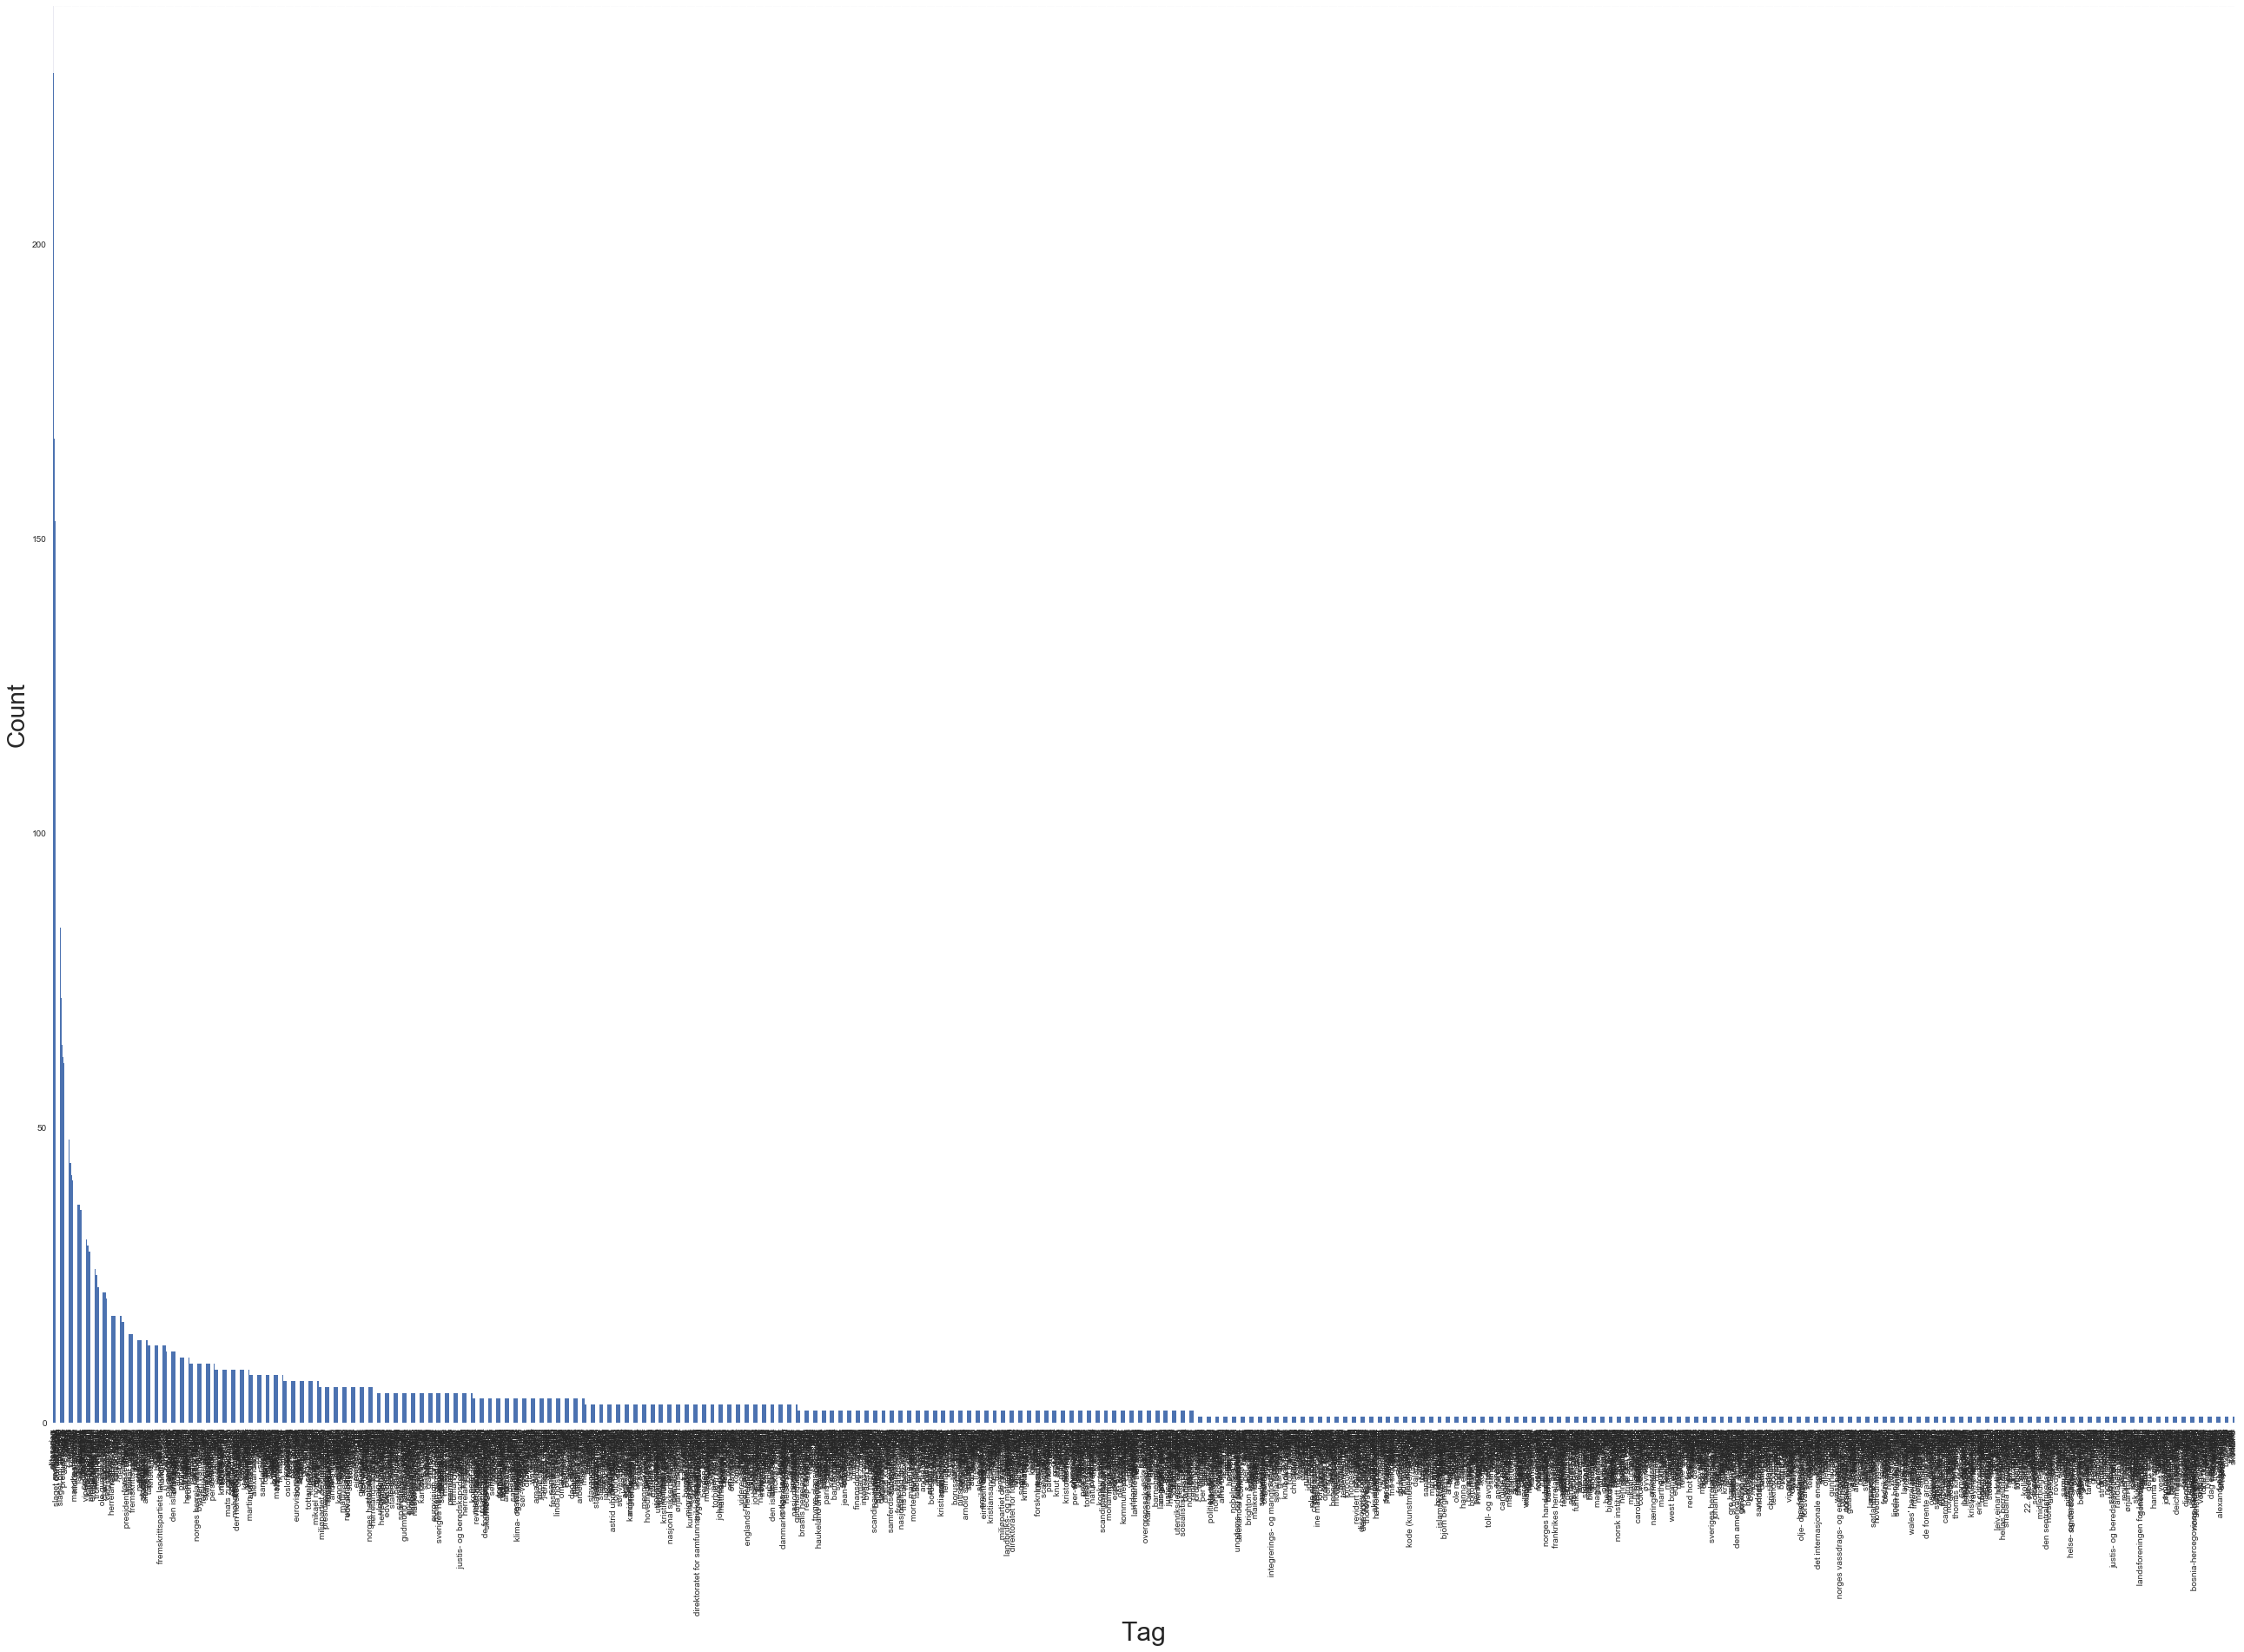

In [34]:
sns.set(rc={"figure.figsize": (45, 30)})
(tag.value_counts()).plot(kind='bar')
plt.xlabel('Tag', fontsize=30)
plt.ylabel('Count', fontsize=28)


In [30]:
plot=tag.value_counts()

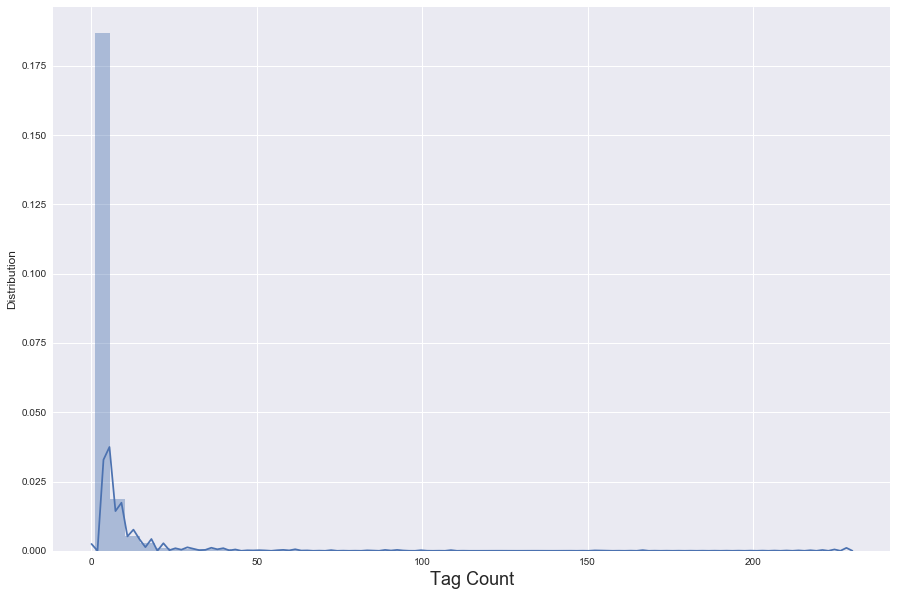

In [32]:
sns.set(rc={"figure.figsize": (15, 10)})
x = plot
sns.distplot(x)
plt.xlabel('Tag Count', fontsize=18)
plt.ylabel('Distribution', fontsize=12)

## data quality: how many impressions have content features
we should merge this one with impression dataset and find the quantity of data cannot have a content features. we assume it should be 100% have content feature, but the reality always below 100%. the gap is the data with qulity issue.

In [14]:
content_df

,id,body,capi-id,categories,content-type,content-type-short,created,hotness,image-url,last-modified,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,0Rrg6,Etter helgens Premier League-runde er det fire...,234850,[fotball],news,news,2017-05-01T07:18:03.000Z,40,https://vertical.snd.no/images/38c6a0c9-64c3-4...,2017-05-01T08:56:02.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Den...,2017-05-01T08:30:13.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[manchester city, engelsk fotball, manchester ...",Den tette kampen mellom Guardiola og Klopp kan...
1,0Rr7G,Også denne sesongen har Lionel Messi bøttet in...,234868,[fotball],news,news,2017-05-01T15:16:34.000Z,40,https://vertical.snd.no/images/ba027d24-cee0-4...,2017-05-01T17:26:51.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Bil...,2017-05-01T17:22:22.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[lionel messi, teheran, barcelona, argentina, ...",Bildene av Messis dobbeltgjenger går verden ru...
2,1lrJl,Sarpsborg-Rosenborg 1–2 \n– Det blir den klass...,234881,[fotball],news,news,2017-05-01T19:54:36.000Z,40,https://vertical.snd.no/images/6abc8680-05af-4...,2017-05-01T20:52:37.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Fo...,2017-05-01T20:52:37.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[eliteserien, sarpsborg 08, rosenborg bk]",– For fem år siden hadde jeg sikkert gravd meg...
3,1lr9e,"Hamas-leder Khaled Meshaal, som bor i eksil i ...",620268,[verden],news,news,2017-05-01T18:38:32.000Z,30,https://ap.mnocdn.no/images/afb62071-4c86-4a1c...,2017-05-01T18:42:25.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Hamas-vil-ikk...,2017-05-01T18:38:32.000Z,http://www.aftenposten.no/article/ap-620268b.html,ap,bench,published,[],Hamas vil ikke lenger kreve at Israel skal uts...
4,0RrOJ,Hoppsjef Clas Brede Bråthen har sagt til NTB a...,234859,[vintersport],news,news,2017-05-01T11:16:31.000Z,30,https://vertical.snd.no/images/259a16bf-c2cd-4...,2017-05-01T11:18:40.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/vintersport...,2017-05-01T11:18:23.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[hopp, holmenkollen, fis]",Skiforbundet vil ikke flytte Kollensøndagen
5,0RWrJ,Siv Jensen tar imot Aftenposten på møterommet ...,620160,"[norge, politikk]",news,news,2017-04-28T16:46:11.000Z,60,https://ap.mnocdn.no/images/edda47a8-6b1d-45c2...,2017-05-01T18:45:07.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/---De...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-620160b.html,ap,bench,published,"[siv jensen, stortingsvalg 2017, fremskrittspa...",- Det er ganske kjedelig i lengden når hvert ...
6,0Rr8A,Underholdning er ikke mangelvare i den ustabil...,234883,[fotball],news,news,2017-05-01T20:36:45.000Z,30,https://vertical.snd.no/images/8684374e-bde7-4...,2017-05-01T21:06:04.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Mi...,2017-05-01T21:06:04.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[mushaga bakenga, tore reginiussen, sarpsborg,...",Minner mer og mer om Erik Hamréns RBK
7,1aK7e,– 2016 var året USA og Storbritannia våknet op...,618629,[verden],news,news,2017-04-04T15:36:49.000Z,60,https://ap.mnocdn.no/images/8a59f5df-bd5a-43e6...,2017-05-01T21:07:21.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Trumps-seier-...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-618629b.html,ap,bench,published,"[marine le pen, donald trump, presidentvalget ...",Trumps seier har ikke løftet protestpartiene i...
8,26oea,Alexander Kristoff (29) klinket till og vant E...,234874,[sykkel],news,news,2017-05-01T16:48:59.000Z,40,https://vertical

### load impression dataset (2 days)

In [35]:
# df1 = pd.read_csv("joined_impressions.csv", encoding="Latin-1")

In [36]:
df2 = pd.read_csv(
    '20170601_joined_impressions_clean.csv', sep=',', 
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

In [37]:
df3 = pd.read_csv(
    '20170602_joined_impressions.csv', sep=',', 
    names=['experiment', 'variant', 'userId', 'environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    usecols=['environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

### Concatenating objects

In [41]:
frames = [df2, df3]
dfall = pd.concat(frames)

In [42]:
dfall

,IsClicked,Unnamed: 0,clickTimestamp,clickedPageViewId,contentId,contentPageViewId,contentPosition,contentWordCount,environmentId,frontPageViewId,impressionTimestamp,maxDuration,maxScrollPosition,maxSecondsSincePageView
0,0.0,1.0,NaT,NaN,26r1x,NaN,8.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:23,NaN,NaN,NaN
1,0.0,2.0,NaT,NaN,yAAMA,NaN,9.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:21,NaN,NaN,NaN
2,0.0,3.0,NaT,NaN,vRLqm,NaN,10.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:21,NaN,NaN,NaN
3,0.0,4.0,NaT,NaN,OxdE3,NaN,11.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:35,NaN,NaN,NaN
4,0.0,5.0,NaT,NaN,VA4Mr,NaN,12.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:37,NaN,NaN,NaN
5,0.0,6.0,NaT,NaN,OKKXk,NaN,13.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:37,NaN,NaN,NaN
6,0.0,7.0,NaT,NaN,VAA36,NaN,14.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:39,NaN,NaN,NaN
7,1.0,8.0,2017-06-01 15:09:53,301bec19-12c3-45c1-afca-f14494d51a5e,97Rmr,NaN,15.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,2017-06-01 15:09:43,NaN,NaN,NaN
8,0.0,9.0,NaT,NaN,MyKpE,NaN,0.0,NaN,NaN,00001212-9021-41c4-8280-95712083b45b,2017-06-01 20:56:59,NaN,NaN,NaN
9,0.0,10.0,NaT,NaN,WpVxG,NaN,0.0,NaN,NaN,000018ba-3861-40c2-9649-af74988987e2,2017-06-01 07:47:19,NaN,NaN,NaN


In [43]:
dfall.keys()

Index(['IsClicked', 'Unnamed: 0', 'clickTimestamp', 'clickedPageViewId',
       'contentId', 'contentPageViewId', 'contentPosition', 'contentWordCount',
       'environmentId', 'frontPageViewId', 'impressionTimestamp',
       'maxDuration', 'maxScrollPosition', 'maxSecondsSincePageView'],
      dtype='object')

### merge content id with dfall

In [50]:
content_df.columns = ['contentId','body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title']

In [51]:
content_df.keys()

Index(['contentId', 'body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title'],
      dtype='object')

In [52]:
mergedf = dfall.merge(content_df,on='contentId',how='left')

In [53]:
mergedf

,IsClicked,Unnamed: 0,clickTimestamp,clickedPageViewId,contentId,contentPageViewId,contentPosition,contentWordCount,environmentId,frontPageViewId,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,0.0,1.0,NaT,NaN,26r1x,NaN,8.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/NRK...,2017-06-01T11:51:22.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[florø sk, sogndal il]",NRK beklager nakenbilder: – Det var ikke grove...
1,0.0,2.0,NaT,NaN,yAAMA,NaN,9.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,open,"metered,subscription",http://www.aftenposten.no/meninger/sid/I-ar-va...,2017-05-31T15:36:17.000Z,http://www.aftenposten.no/article/ap-622121b.html,ap,bench,published,"[litteratur, eksamen, kvinner, feminisme, teat...",I år var eksamensoppgaven så god at elevene di...
2,0.0,3.0,NaT,NaN,vRLqm,NaN,10.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,"metered,subscription",http://www.aftenposten.no/osloby/E18-saken-Osl...,2017-06-01T11:24:41.000Z,http://www.aftenposten.no/article/ap-622316b.html,ap,bench,published,"[åsmund aukrust, e18]",E18-saken: Oslo Ap tapte for Ap på Stortinget
3,0.0,4.0,NaT,NaN,OxdE3,NaN,11.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,subscription,http://www.aftenposten.no/amagasinet/Frode-Thu...,2017-05-31T04:48:59.000Z,http://www.aftenposten.no/article/ap-621660b.html,ap,bench,published,"[me, frode thuen]",Frode Thuen: Hun er kronisk syk
4,0.0,5.0,NaT,NaN,VA4Mr,NaN,12.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,subscription,http://www.aftenposten.no/norge/-I-dette-valge...,2017-05-31T17:27:04.000Z,http://www.aftenposten.no/article/ap-619877b.html,ap,bench,published,"[journalistikk, lisbeth berg-hansen, frank aar...",I dette valget lager politikerne nyhetene selv
5,0.0,6.0,NaT,NaN,OKKXk,NaN,13.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,subscription,http://www.aftenposten.no/amagasinet/Gronnsake...,2017-05-25T19:57:44.000Z,http://www.aftenposten.no/article/ap-618152b.html,ap,bench,published,"[psykiatri, depresjon, medisin]","Grønnsaker, fisk, fullkorn og olivenolje mot d..."
6,0.0,7.0,NaT,NaN,VAA36,NaN,14.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Heg...,2017-05-31T18:49:13.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[ada hegerberg, kvinnefotball, olympique lyon,...",Hegerberg går til finalen som «verdens beste»:...
7,1.0,8.0,2017-06-01 15:09:53,301bec19-12c3-45c1-afca-f14494d51a5e,97Rmr,NaN,15.0,NaN,NaN,0000051c-784a-4103-a30e-61c743218977,...,closed,subscription,http://www.aftenposten.no/kultur/Leif-Ove-Ands...,2017-06-01T10:22:32.000Z,http://www.aftenposten.no/article/ap-622338b.html,ap,bench,published,"[konsert, musikk, grieghallen, leif ove andsne...",Leif Ove Andsnes reagerer på vindrikking på kl...
8,0.0,9.0,NaT,NaN,MyKpE,NaN,0.0,NaN,NaN,00001212-9021-41c4-8280-95712083b45b,...,closed,"metered,subscription",http://www.aftenposten.no/verden/President-Don...,2017-06-01T19:36:02.000Z,http://www.aftenposten.no/article/ap-622387b.html,ap,bench,published,"[eu, parisavtalen, det hvite hus, donald trump...",President Donald Trump: USA trekker seg fra Pa...
9,0.0,10.0,NaT,NaN,WpVxG,NaN,0.0,NaN,NaN,000018ba-3861-40c2-9649-af74988987e2,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/Nar-u...,2017-05-31T19:00:00.000Z,http://www.aftenposten.no/article/ap-622200b.html,ap,bench,published,"[stortingsvalg 2017, stortingsvalg, politikk]","Når unge flytter hjemmefra, slutter mange å st..."


In [54]:
mergedf.keys()

Index(['IsClicked', 'Unnamed: 0', 'clickTimestamp', 'clickedPageViewId',
       'contentId', 'contentPageViewId', 'contentPosition', 'contentWordCount',
       'environmentId', 'frontPageViewId', 'impressionTimestamp',
       'maxDuration', 'maxScrollPosition', 'maxSecondsSincePageView', 'body',
       'capi-id', 'categories', 'content-type', 'content-type-short',
       'created', 'hotness', 'image-url', 'last-modified', 'lead', 'lifetime',
       'normalized-hotness', 'normalized-lifetime', 'paywall-state',
       'paywall-type', 'presentation-url', 'published', 'share-url',
       'source-publication', 'source-system', 'status', 'tags', 'title'],
      dtype='object')

### choose a column to check null data

In [57]:
content_df['check null']=content_df['capi-id']>0

In [59]:
content_df['check null'].value_counts()

True    3882
Name: check null, dtype: int64

### check if all merge dataset have content id 

In [66]:
(mergedf['contentId'].isnull()).value_counts()

False    13309188
Name: contentId, dtype: int64

### check null data of merge dataset and compute amount

In [67]:
mergedf['check null']=mergedf['capi-id']>0

In [125]:
dfissue=pd.DataFrame((mergedf['check null']).value_counts())

In [151]:
dfissue['check null'][0]/(dfissue['check null'].sum())

0.14388473586818371

## Distribution of hotness & lifetime

In [155]:
x=(content_df.hotness.value_counts()).sort_index()

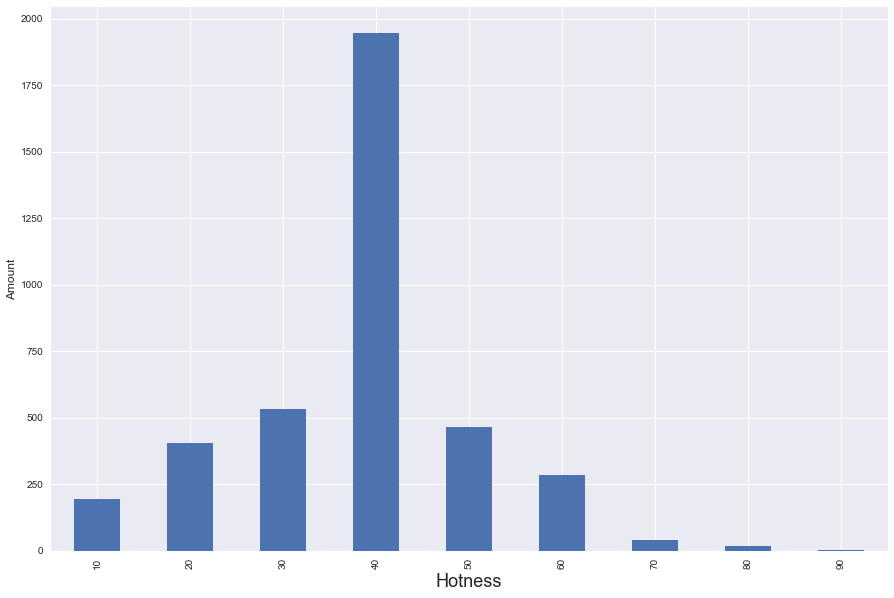

In [17]:
sns.set(rc={"figure.figsize": (15, 10)})
x.plot(kind='bar')
plt.xlabel('Hotness', fontsize=18)
plt.ylabel('Amount', fontsize=12)

In [160]:
(content_df.hotness.describe())

count    3882.000000
mean       38.189078
std        12.427260
min        10.000000
25%        30.000000
50%        40.000000
75%        40.000000
max        90.000000
Name: hotness, dtype: float64

In [18]:
content_df.keys()

Index(['id', 'body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title'],
      dtype='object')

In [19]:
(content_df['normalized-hotness']).value_counts()

2.0    1947
1.5     533
2.5     465
1.0     406
3.0     283
0.5     192
3.5      38
4.0      17
4.5       1
Name: normalized-hotness, dtype: int64

In [20]:
lt=(content_df['lifetime']).value_counts()

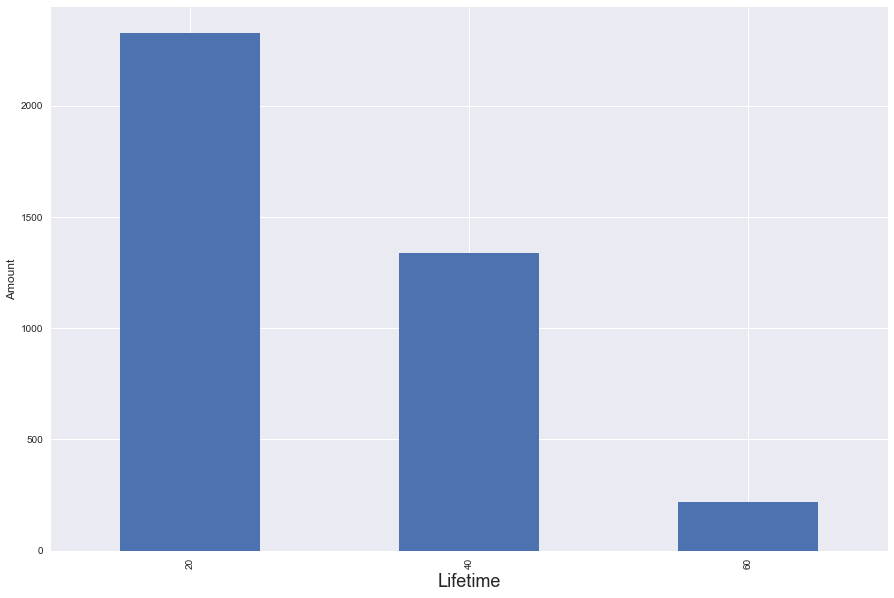

In [21]:
sns.set(rc={"figure.figsize": (15, 10)})
lt.plot(kind='bar')
plt.xlabel('Lifetime', fontsize=18)
plt.ylabel('Amount', fontsize=12)

In [22]:
content_df['lead']

0       Manchester City og Liverpool kan havne helt li...
1       En til nå ukjent mann fra Iran får knapt gå i ...
2       «Tabbekeeper» André Hansen hyller tre lagkompi...
3       Hamas kommer ikke lenger til å kreve at staten...
4                           Uenigheter om Kollensøndagen.
5       Livet i opposisjon er ingenting for Frp-leder ...
6        Kommentar: Det siste kvarteret var så ellevil...
7       BRUSSEL/SAVERNE (Aftenposten): Etter en krafti...
8                 – Sangen var enda sterkere enn seieren.
9       Stockholmspolitiet mistenker ildspåsettelse et...
10      Minst 27 personer ble skadet da et Aeroflot-fl...
11      Sarpsborg 08 hadde Rosenborg i kne, men det va...
12      Tåken forsvinner i løpet av formiddagen, og 1....
13      Aalesund startet sesongen med to strake tap, m...
14      Medarbeiderflukt, billettsalgtrøbbel, byråkrat...
15      Brexit og Trumps proteksjonistiske linje får m...
16      Seks personer omkom og 22 ble skadet da en kra...
17      Arenda

In [26]:
content_df.keys()

Index(['id', 'body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title'],
      dtype='object')